<a href="https://colab.research.google.com/github/jioooo20/pengolahan-citra-dan-visi-komputer/blob/main/week5_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<BarContainer object of 256 artists>

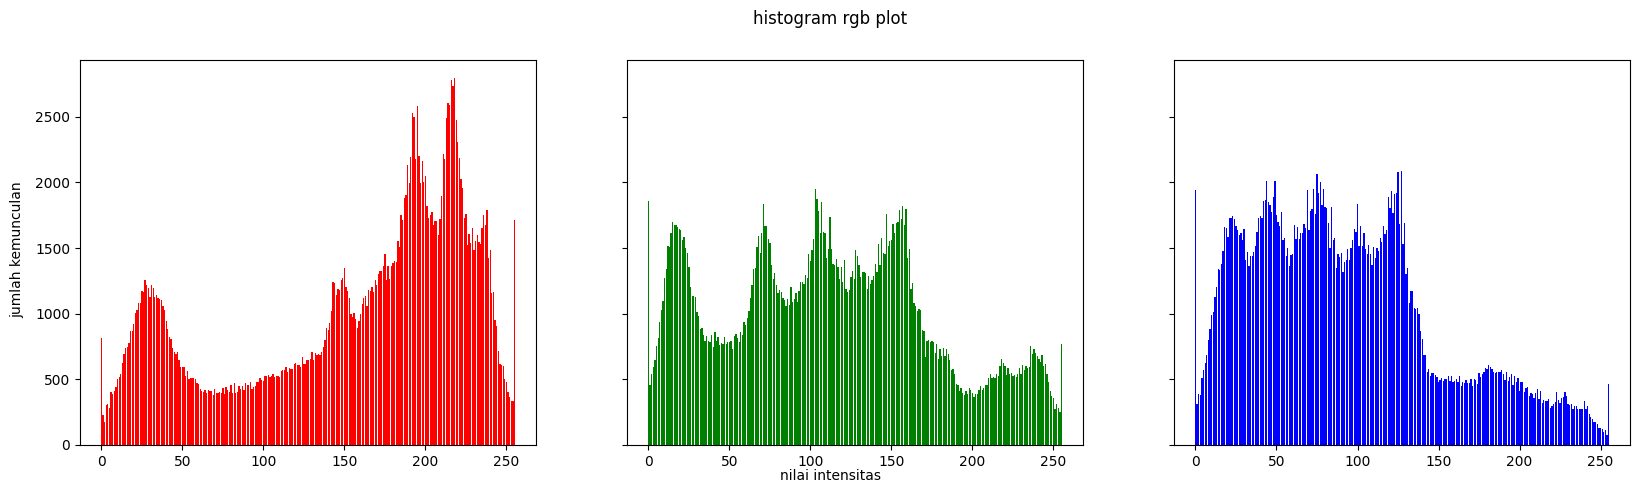

In [40]:
#membuat histogram img manual
img = cv.cvtColor(cv.imread('/content/drive/MyDrive/citrapcvk/lena.jpg'), cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0] * 256
green = [0] * 256
blue = [0] * 256

for y in range(0,height):
  for x in range(0,width):
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1,3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('histogram rgb plot')
fig.text(0.09, 0.5, 'jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'nilai intensitas', ha='center')
axs[0].bar(names, red, color='r')
axs[1].bar(names, green, color='g')
axs[2].bar(names, blue, color='b')

PERTANYAAN PRAKTIKUM D1
1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?
2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

In [41]:
#1 histogram numpi

r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

histr, binsr = np.histogram(r.flatten(), 256, [0,256])
histg, binsg = np.histogram(g.flatten(), 256, [0,256])
histb, binsb = np.histogram(b.flatten(), 256, [0,256])

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Histogram Red')
plt.bar(binsr[:-1], histr, color='red', width=1)
plt.xlim([0,256])

plt.subplot(1,3,2)
plt.title('Histogram Green')
plt.bar(binsg[:-1], histg, color='green', width=1)
plt.xlim([0,256])

plt.subplot(1,3,3)
plt.title('Histogram Blue')
plt.bar(binsb[:-1], histb, color='blue', width=1)
plt.xlim([0,256])

plt.tight_layout()
plt.show()


hasil dari menggunakan historgram dari libarray numpy, output yang muncul sama saja.

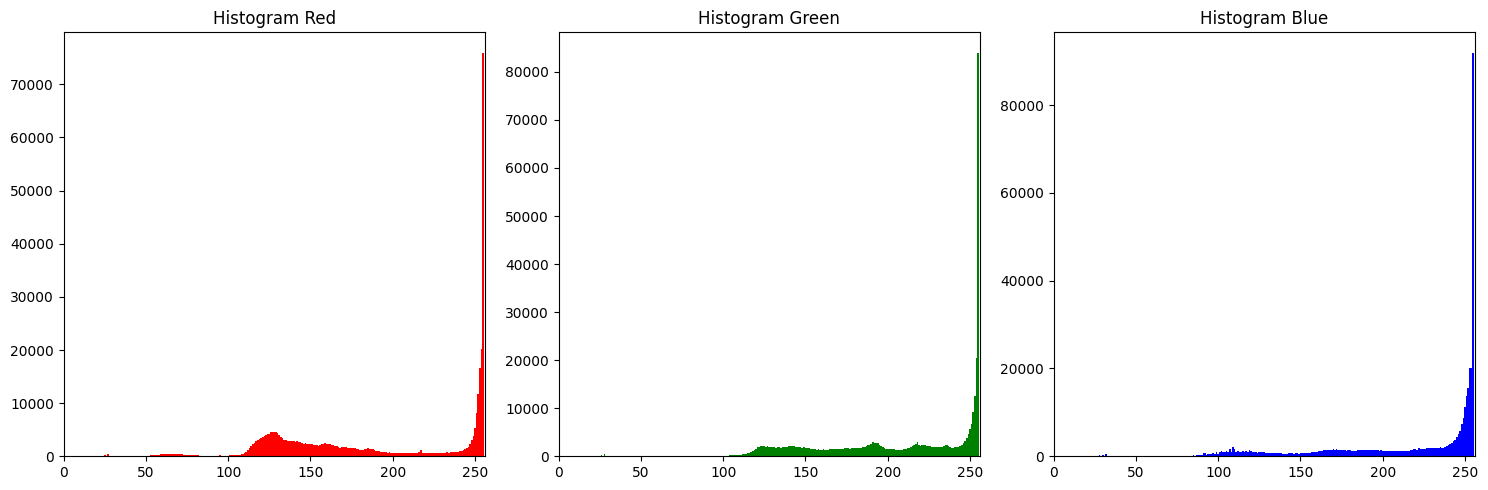

In [42]:
#2 histogram ktm lama jpg

ktm = cv.cvtColor(cv.imread('/content/drive/MyDrive/citrapcvk/KTM lama.jpg'), cv.COLOR_BGR2RGB)

r, g, b = ktm[:,:,0], ktm[:,:,1], ktm[:,:,2]

histr, binsr = np.histogram(r.flatten(), 256, [0,256])
histg, binsg = np.histogram(g.flatten(), 256, [0,256])
histb, binsb = np.histogram(b.flatten(), 256, [0,256])

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Histogram Red')
plt.bar(binsr[:-1], histr, color='red', width=1)
plt.xlim([0,256])

plt.subplot(1,3,2)
plt.title('Histogram Green')
plt.bar(binsg[:-1], histg, color='green', width=1)
plt.xlim([0,256])

plt.subplot(1,3,3)
plt.title('Histogram Blue')
plt.bar(binsb[:-1], histb, color='blue', width=1)
plt.xlim([0,256])

plt.tight_layout()
plt.show()

dari histogram diatas, dapat disimpulkan seluruh warna memiliki mayoritas warna terang, dan beberapa puncak kecil di area gelap juga. jadi gambar cenderung terang dan memiliki kontras yang sedikit tinggi.

# **D-2 PERCOBAAN HISTOGRAM EQUALIZATION**

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

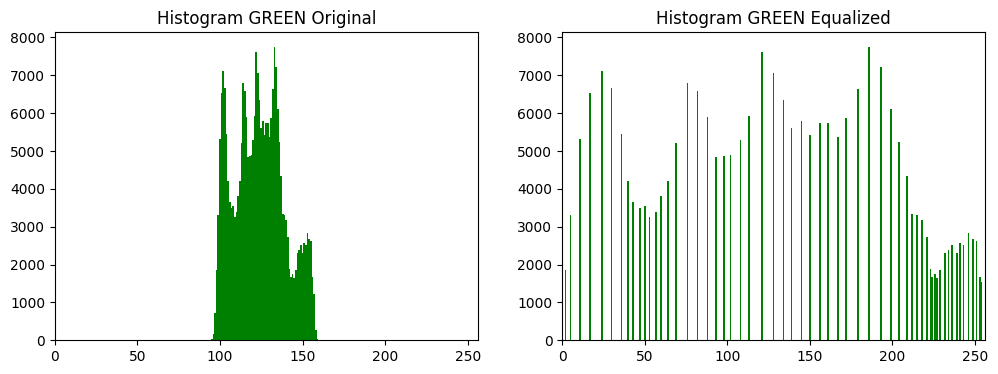

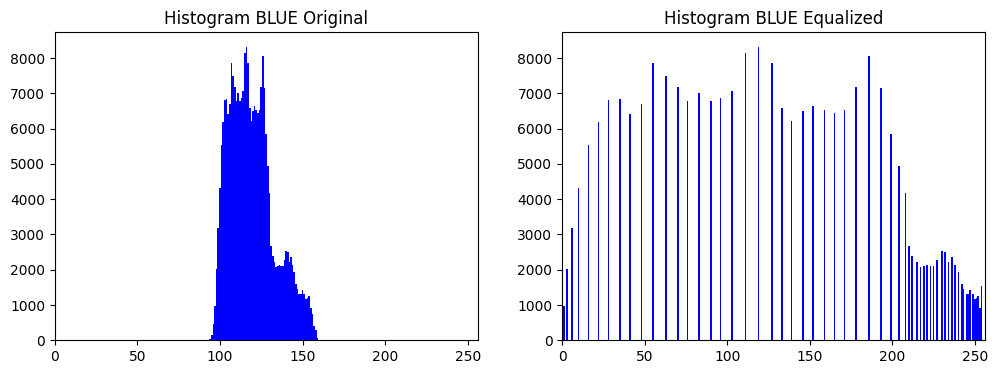

In [43]:
lenalc = cv.cvtColor(cv.imread('/content/drive/MyDrive/citrapcvk/lena_lc.jpg'), cv.COLOR_BGR2RGB)

r, g, b = lenalc[:,:,0], lenalc[:,:,1], lenalc[:,:,2]

histr, binsr = np.histogram(r.flatten(), 256, [0,256])
histg, binsg = np.histogram(g.flatten(), 256, [0,256])
histb, binsb = np.histogram(b.flatten(), 256, [0,256])

def manual_hist_equalization(channel):
    # 2. Hitung histogram (256 bin)
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])

    # 3. Hitung CDF (kumulatif)
    cdf = hist.cumsum()

    # 4. Normalisasi CDF ke rentang 0-255
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # 5. Mapping nilai lama ke nilai baru
    img_eq = cdf_normalized[channel]

    return img_eq, hist, cdf_normalized

# Proses equalization masing-masing channel
r_eq, hist_r, cdf_r = manual_hist_equalization(r)
g_eq, hist_g, cdf_g = manual_hist_equalization(g)
b_eq, hist_b, cdf_b = manual_hist_equalization(b)

# Gabungkan kembali ke RGB
img_eq = cv.merge((r_eq, g_eq, b_eq))

# Tampilkan citra sebelum & sesudah
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(lenalc)
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Citra Hasil Histogram Equalization")
plt.axis('off')
plt.show()

# Tampilkan histogram sebelum dan sesudah
def plot_histograms(original_channel, equalized_channel, color):
    hist_orig, _ = np.histogram(original_channel.flatten(), 256, [0,256])
    hist_eq, _ = np.histogram(equalized_channel.flatten(), 256, [0,256])
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.bar(range(256), hist_orig, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Original')
    plt.xlim([0,256])
    plt.subplot(1,2,2)
    plt.bar(range(256), hist_eq, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Equalized')
    plt.xlim([0,256])
    plt.show()

# Plot histogram tiap channel sebelum & sesudah
plot_histograms(r, r_eq, 'red')
plot_histograms(g, g_eq, 'green')
plot_histograms(b, b_eq, 'blue')



2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada
potongan kode berikut ini.

```
b, g, r = cv2.split(image)

beq = cv2.equalizeHist(b)
geq = cv2.equalizeHist(g)
req = cv2.equalizeHist(r)

```

Lengkapi potongan kode tersebut! Bandingkan hasilnya. Apakah output muncul sama?

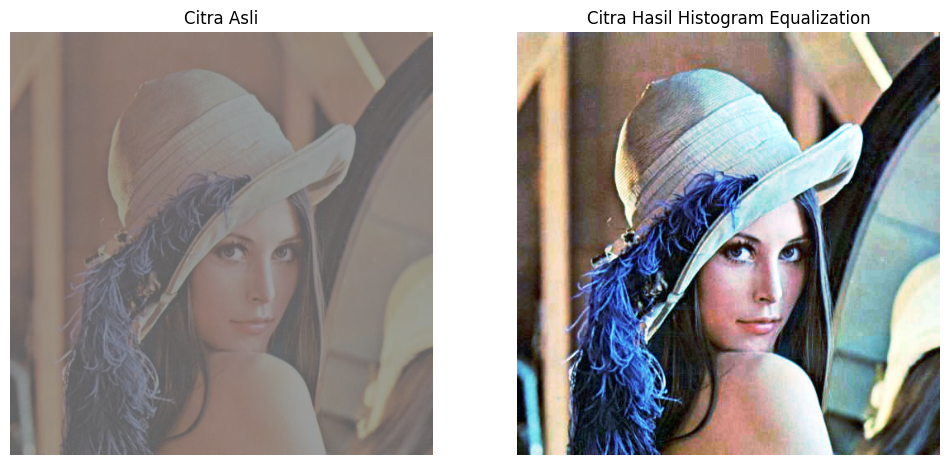

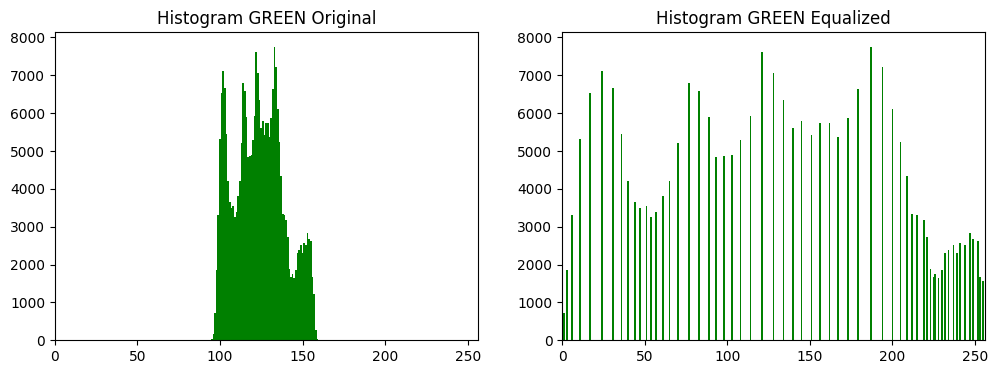

In [44]:
lenalc = cv.cvtColor(cv.imread('/content/drive/MyDrive/citrapcvk/lena_lc.jpg'), cv.COLOR_BGR2RGB)

r, g, b = lenalc[:,:,0], lenalc[:,:,1], lenalc[:,:,2]

histr, binsr = np.histogram(r.flatten(), 256, [0,256])
histg, binsg = np.histogram(g.flatten(), 256, [0,256])
histb, binsb = np.histogram(b.flatten(), 256, [0,256])

def manual_hist_equalization(channel):
    # 2. Hitung histogram (256 bin)
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])

    # 3. Hitung CDF (kumulatif)
    cdf = hist.cumsum()

    # 4. Normalisasi CDF ke rentang 0-255
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # 5. Mapping nilai lama ke nilai baru
    img_eq = cdf_normalized[channel]

    return img_eq, hist, cdf_normalized

# Proses equalization masing-masing channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali ke RGB
img_eq = cv.merge((r_eq, g_eq, b_eq))

# Tampilkan citra sebelum & sesudah
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(lenalc)
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Citra Hasil Histogram Equalization")
plt.axis('off')
plt.show()

# Tampilkan histogram sebelum dan sesudah
def plot_histograms(original_channel, equalized_channel, color):
    hist_orig, _ = np.histogram(original_channel.flatten(), 256, [0,256])
    hist_eq, _ = np.histogram(equalized_channel.flatten(), 256, [0,256])
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.bar(range(256), hist_orig, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Original')
    plt.xlim([0,256])
    plt.subplot(1,2,2)
    plt.bar(range(256), hist_eq, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Equalized')
    plt.xlim([0,256])
    plt.show()

# Plot histogram tiap channel sebelum & sesudah
plot_histograms(r, r_eq, 'red')
plot_histograms(g, g_eq, 'green')
plot_histograms(b, b_eq, 'blue')



setelah mengamati hasil dari citra di atas, output yang muncul sama saja

# **PERTANYAAN PRAKTIKUM D2**

1. Perbandingan Citra Lena

    a. Gunakan hasil histogram equalization pada citra lena.jpg.

    b. Hitung nilai PSNR antara citra asli dan citra hasil equalization.
    
    c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
    visual citra? Apakah ada detail baru yang muncul setelah equalization?

2. Gunakan Citra KTM Lama.jpg

    a. Terapkan histogram equalization pada citra KTM lama.jpg.

    b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
    dalam satu layout.

    c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
    
    Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
    teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
    informasi dari citra atau justru membuat citra terlihat terlalu “keras”.


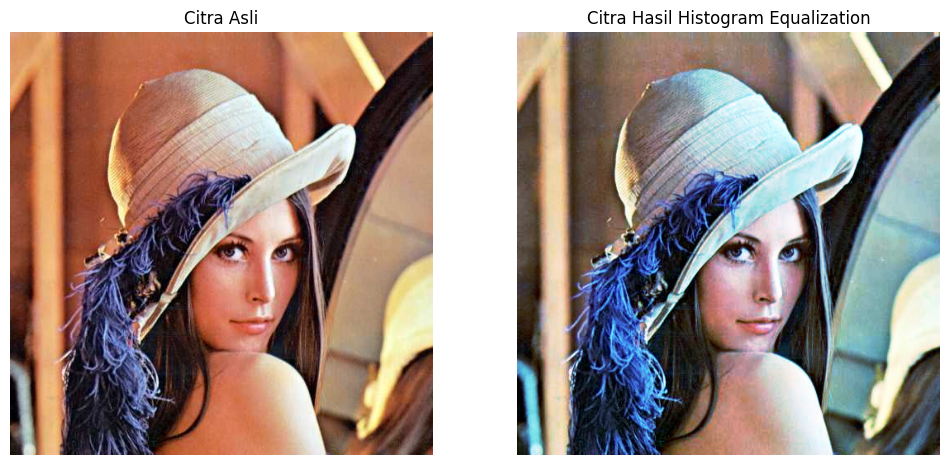

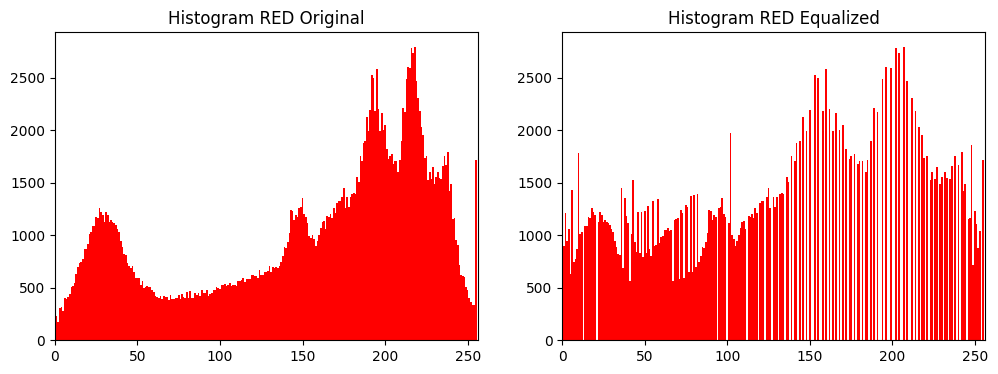

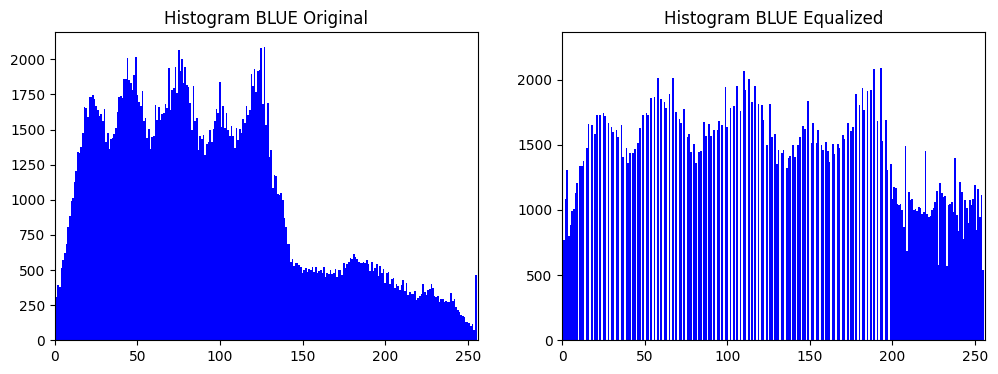

In [45]:
# 1. a.Gunakan hasil histogram equalization pada citra lena.jpg
lenaori = cv.cvtColor(cv.imread('/content/drive/MyDrive/citrapcvk/lena.jpg'), cv.COLOR_BGR2RGB)

r, g, b = lenaori[:,:,0], lenaori[:,:,1], lenaori[:,:,2]

histr, binsr = np.histogram(r.flatten(), 256, [0,256])
histg, binsg = np.histogram(g.flatten(), 256, [0,256])
histb, binsb = np.histogram(b.flatten(), 256, [0,256])

def manual_hist_equalization(channel):
    # 2. Hitung histogram (256 bin)
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])

    # 3. Hitung CDF (kumulatif)
    cdf = hist.cumsum()

    # 4. Normalisasi CDF ke rentang 0-255
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # 5. Mapping nilai lama ke nilai baru
    img_eq = cdf_normalized[channel]

    return img_eq, hist, cdf_normalized

# Proses equalization masing-masing channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali ke RGB
img_eq = cv.merge((r_eq, g_eq, b_eq))

# Tampilkan citra sebelum & sesudah
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(lenaori)
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Citra Hasil Histogram Equalization")
plt.axis('off')
plt.show()

# Tampilkan histogram sebelum dan sesudah
def plot_histograms(original_channel, equalized_channel, color):
    hist_orig, _ = np.histogram(original_channel.flatten(), 256, [0,256])
    hist_eq, _ = np.histogram(equalized_channel.flatten(), 256, [0,256])
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.bar(range(256), hist_orig, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Original')
    plt.xlim([0,256])
    plt.subplot(1,2,2)
    plt.bar(range(256), hist_eq, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Equalized')
    plt.xlim([0,256])
    plt.show()

# Plot histogram tiap channel sebelum & sesudah
plot_histograms(r, r_eq, 'red')
plot_histograms(g, g_eq, 'green')
plot_histograms(b, b_eq, 'blue')



In [46]:
# 1. b.Hitung nilai PSNR antara citra asli dan citra hasil equalization.
from math import log10, sqrt


def PSNR(ori, kw):
    mse = np.mean((ori - kw) ** 2)
    if mse == 0:
        return 100
    max_piksel = 255.0
    psnr = 20 * log10(max_piksel / sqrt(mse))
    return psnr

nilai_pnsr = PSNR(lenaori, img_eq)

print(f'Hasil hitung nilai PSNR antara citra asli dan citra hasil equalization', nilai_pnsr)

Hasil hitung nilai PSNR antara citra asli dan citra hasil equalization 28.460093386445386


1. c.

dari nilai yang muncul yaitu 28.5 db, nilai ini tergolong rendah ke sedang, ada perbedaan visual yang cukup jelas diantara citra asli dan hasil equalization.

meski nilai pnsr rendah, kontras dan persebaran gelap terang jadi lebih baik secarar visual

detail baru pada hasil equalization menyebarkan intensitas piksel lebih merata seperti area gelap menjadi lebih terang, area yang trlalu terang diratakan

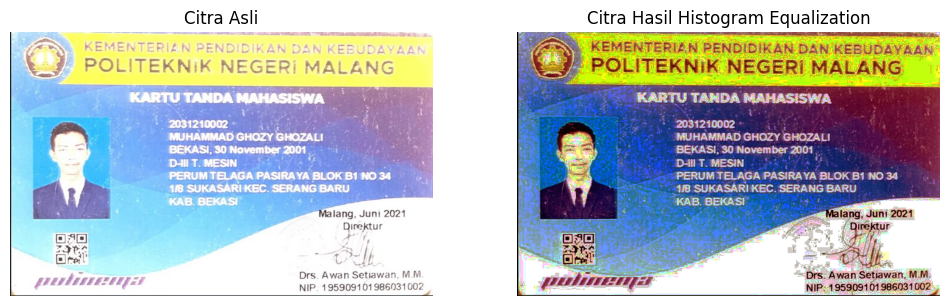

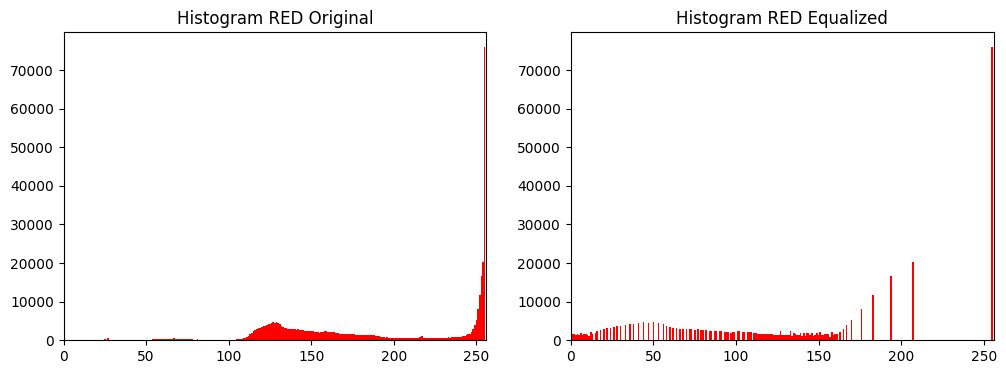

In [47]:
# 2 a Terapkan histogram equalization pada citra KTM lama.jpg.
# 2 b Tampilkan citra asli, citra hasil equalization, serta histogram keduanya dalam satu layout.
ktm = cv.cvtColor(cv.imread('/content/drive/MyDrive/citrapcvk/KTM lama.jpg'), cv.COLOR_BGR2RGB)

r, g, b = ktm[:,:,0], ktm[:,:,1], ktm[:,:,2]

histr, binsr = np.histogram(r.flatten(), 256, [0,256])
histg, binsg = np.histogram(g.flatten(), 256, [0,256])
histb, binsb = np.histogram(b.flatten(), 256, [0,256])

def manual_hist_equalization(channel):
    # 2. Hitung histogram (256 bin)
    hist, bins = np.histogram(channel.flatten(), 256, [0,256])

    # 3. Hitung CDF (kumulatif)
    cdf = hist.cumsum()

    # 4. Normalisasi CDF ke rentang 0-255
    cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    # 5. Mapping nilai lama ke nilai baru
    img_eq = cdf_normalized[channel]

    return img_eq, hist, cdf_normalized

# Proses equalization masing-masing channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali ke RGB
img_eq = cv.merge((r_eq, g_eq, b_eq))

# Tampilkan citra sebelum & sesudah
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(ktm)
plt.title("Citra Asli")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Citra Hasil Histogram Equalization")
plt.axis('off')
plt.show()

# Tampilkan histogram sebelum dan sesudah
def plot_histograms(original_channel, equalized_channel, color):
    hist_orig, _ = np.histogram(original_channel.flatten(), 256, [0,256])
    hist_eq, _ = np.histogram(equalized_channel.flatten(), 256, [0,256])
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.bar(range(256), hist_orig, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Original')
    plt.xlim([0,256])
    plt.subplot(1,2,2)
    plt.bar(range(256), hist_eq, color=color, width=1)
    plt.title(f'Histogram {color.upper()} Equalized')
    plt.xlim([0,256])
    plt.show()

# Plot histogram tiap channel sebelum & sesudah
plot_histograms(r, r_eq, 'red')
plot_histograms(g, g_eq, 'green')
plot_histograms(b, b_eq, 'blue')



c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

**Jawab**

dari hasil perbedaan terdapat pada wajah yang kontrasnya  lebih terlihat, bayangan lebih tajam, detail rambut tampak terlihat namun kulit jadi terasa "keras". lalu pada teks menjadi lebih kontras sehingga terlihat lebih menyala. pada latar belakang boru menjadi kontrasnya menjadi tinggi, terasa ada grain besar yang cukup kasar.

kualitas informasi pada teks terlihat lebih mudah dibaca, namun pada wajah menjadi terlihat lebih kontras sehingga wajah terasa "keras"

# **D-3 TUGAS PRAKTIKUM DITHERING**

1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

In [48]:
h,w,rgb = lenaori.shape
hasildith = lenaori.copy()

#cari warna terdekat
def WarnaTerdekat(pixel):
  return np.where(pixel <128, 0, 255)

#truncate agar gx keluar 0-255
def Truncate(val):
  return np.clip(val, 0, 255)

for y in range(h-1):
  for x in range(w-1):
    old_pix = hasildith[y,x].copy()
    new_pix = WarnaTerdekat(old_pix)
    hasildith[y,x] = new_pix
    error = old_pix - new_pix

    #kanan
    hasildith[y, x+1] = Truncate(hasildith[y, x+1] + (0.5)*error)

    #bawah
    hasildith[y+1, x] = Truncate(hasildith[y+1, x] + (0.5)*error)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('gambar asli')
plt.imshow(lenaori)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('gambar hasil dithering')
plt.imshow(hasildith)
plt.axis('off')
plt.show()

2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

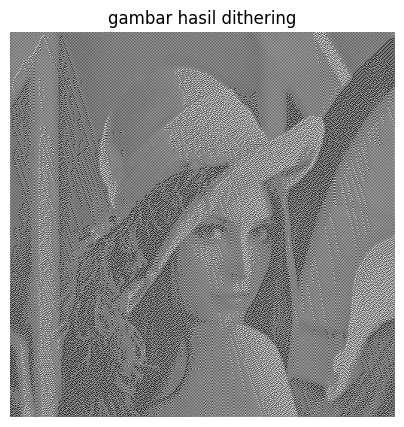

In [49]:
lenalcgrey = lenalc.copy()
lenalcgrey = cv.cvtColor(lenalcgrey, cv.COLOR_RGB2GRAY)
lenalcgreydithFNS = lenalcgrey.copy()

lenalcgrey.shape

lenalcgrey_eq = cv.equalizeHist(lenalcgrey)


for y in range(h-1):
  for x in range(w-1):
    old_pix = lenalcgreydithFNS[y,x].copy()
    new_pix = WarnaTerdekat(old_pix)
    lenalcgreydithFNS[y,x] = new_pix

    error = old_pix - new_pix
    lenalcgreydithFNS[y+1, x] = Truncate(lenalcgreydithFNS[y+1, x] + (7/16)*error)
    lenalcgreydithFNS[y-1, x+1] = Truncate(lenalcgreydithFNS[y-1, x+1] + (3/16)*error)
    lenalcgreydithFNS[y, x+1] = Truncate(lenalcgreydithFNS[y, x+1] + (5/16)*error)
    lenalcgreydithFNS[y+1, x+1] = Truncate(lenalcgreydithFNS[y+1, x+1] + (1/16)*error)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('gambar asli')
plt.imshow(lenalcgrey, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('gambar hasil dithering')
plt.imshow(lenalcgrey_eq, cmap='gray')
plt.axis('off')
plt.show()

hist_orig, _ = np.histogram(lenalcgrey.flatten(), 256, [0,256])
hist_eq, _ = np.histogram(lenalcgrey_eq.flatten(), 256, [0,256])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(range(256), hist_orig,  width=1)
plt.title(f'Histogram gray Original')
plt.xlim([0,256])
plt.subplot(1,2,2)
plt.bar(range(256), hist_eq,  width=1)
plt.title(f'Histogram gray Equalized')
plt.xlim([0,256])
plt.show()

plt.figure(figsize=(5,5))
plt.title('gambar hasil dithering')
plt.imshow(lenalcgreydithFNS, cmap='gray')
plt.axis('off')
plt.show()